# Geometry optimization

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

import geometry_optimization

In [2]:

# Geometric parameters
maxX = 10e-3
maxY = 10e-3

metalThickness = 100e-9
fingerLength = 10e-3
fingerWidth = 20e-6

gap = fingerWidth

lineWidth = 10e-6
lineLength = maxY-2*lineWidth-gap
resistivityCNTs = 1.75e-5
cNTsThickness = 1e-6
contactResistivityCNTs = 45.4e-6

In [3]:
def compute_C_over_R(fingerLength=fingerLength,\
              fingerWidth=fingerWidth,\
             lineWidth=lineWidth,\
             lineLength=lineLength,\
             gap=gap,\
             metalThickness=metalThickness):
    resistivity=1
    nbFingers = math.floor(maxY/(2*fingerWidth+2*gap))
    epsilon = 1
    C = nbFingers*((fingerLength + fingerWidth - gap)*metalThickness)/(gap+(fingerWidth/2))
    #C = nbFingers*((fingerLength)*metalThickness)/math.pow(gap,2)
    
    R = resistivity*((lineLength/(lineWidth*2*metalThickness))+((nbFingers*fingerLength)/(metalThickness*fingerWidth)))
    
    return C/R
    

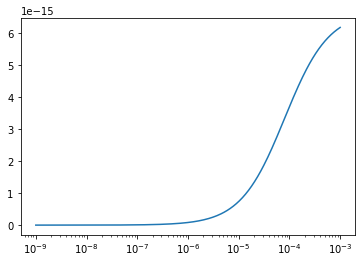

In [4]:
fig, ax = plt.subplots()  # an empty figure with no axes

#ax = plt.subplot()  # a figure with a 2x2 grid of Axes

#fingerLengthList = np.linspace(1.0e-12, 10.0e-6, 300)
fingerLengthList = np.logspace(-9, -3, 300)
ratioCR =  []
for x in fingerLengthList:
    ratioCR.append(compute_C_over_R(x))

#ax.plot(fingerLengthList, ratioCR)
ax.semilogx(fingerLengthList, ratioCR)
plt.show()

## Second optimisation concept

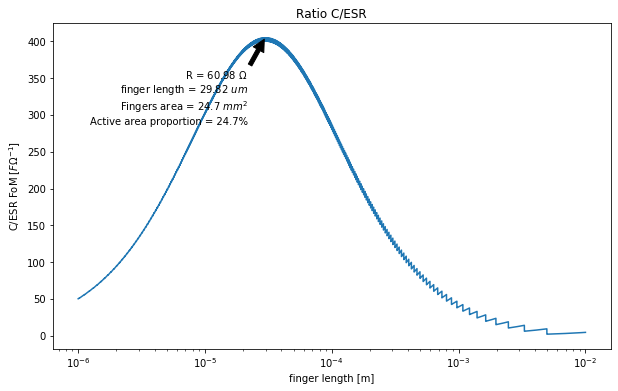

In [5]:
def compute_C_and_R(fingerLength=fingerLength,\
              fingerWidth=fingerWidth,\
             lineWidth=lineWidth,\
             lineLength=lineLength,\
             gap=gap,\
             maxX=maxX,\
             maxY=maxY,\
             metalThickness=metalThickness):
    nbCap = math.floor((maxX-lineWidth)/(lineWidth + fingerLength + gap))
    if nbCap <1:
        nbCap = 1
    #print(nbCap)
    resistivity=1/(9.66e6)
    nbFingers = math.floor((maxY-(2*(lineWidth+gap)))/(fingerWidth+gap))
    epsilon = 1
    dielectricThickness = 1e-9
    Afingers = nbCap*nbFingers*(fingerLength * fingerWidth)
    C = Afingers*epsilon/(dielectricThickness)
    #R = resistivity*((lineLength/(lineWidth*metalThickness))+((fingerLength)/(metalThickness*fingerWidth)))/nbCap
    #R = resistivity*((lineLength/(lineWidth*metalThickness)))/nbCap
    R = resistivity*((lineLength/(lineWidth*metalThickness)))/nbCap+\
        (resistivityCNTs*((fingerLength/(2*fingerWidth*cNTsThickness)))+\
        (contactResistivityCNTs/(fingerWidth*cNTsThickness)))/nbFingers/nbCap
    
    return C,R,Afingers

def get_best_finger_length(fingerLength=fingerLength,\
             fingerWidth=fingerWidth,\
             lineWidth=lineWidth,\
             lineLength=lineLength,\
             gap=gap,\
             maxX=maxX,\
             maxY=maxY,\
             metalThickness=metalThickness):
    fingerLengthList = np.logspace(-6, -2, 20000)
    ratioCR =  []
    for x in fingerLengthList:
        #print(C,R)
        C,R,A = compute_C_and_R(x)
        ratioCR.append(C/R)
        
    import operator
    index, value = max(enumerate(ratioCR), key=operator.itemgetter(1))
        
    bestFingerLength = fingerLengthList[index]
        
    return bestFingerLength

fig, ax = plt.subplots(figsize=(10,6))  # an empty figure with no axes

#ax = plt.subplot()  # a figure with a 2x2 grid of Axes

#fingerLengthList = np.linspace(1.0e-12, 10.0e-6, 300)
fingerLengthList = np.logspace(-6, -2, 20000)
ratioCR =  []
for x in fingerLengthList:
    #print(C,R)
    C,R,A = compute_C_and_R(x)
    ratioCR.append(C/R)
    
import operator
index, value = max(enumerate(ratioCR), key=operator.itemgetter(1))

ax.set_title("Ratio C/ESR")
ax.set_xlabel("finger length [m]")
ax.set_ylabel("C/ESR FoM [$F \Omega^{-1}$]")

bestFingerLength = fingerLengthList[index]
#print(bestFingerLength)
C,R,A = compute_C_and_R(bestFingerLength)
ax.annotate('R = ' + str(round(R,2)) + " $\Omega$"+\
            "\nfinger length = "+str(round(bestFingerLength*1e6,2))+" $um$\n"+\
            "Fingers area = " + str(round(A*1e6,2)) +" $mm^2$\n"+\
            "Active area proportion = " + str(round(100*A/(maxX*maxY),2)) + "%",
            xy=(bestFingerLength, value), xycoords='data',
            xytext=(0.35, 0.86), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

#ax.plot(fingerLengthList, ratioCR)
ax.semilogx(fingerLengthList, ratioCR)
fig.savefig("ratio_over_finger_length.eps")
plt.show()

<ipython-input-5-46bb541e5971>:22: RuntimeWarning: divide by zero encountered in double_scalars
  (resistivityCNTs*((fingerLength/(2*fingerWidth*cNTsThickness)))+\


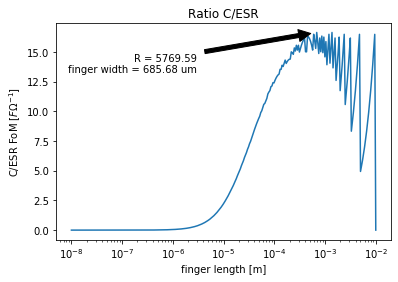

In [6]:
fig, ax = plt.subplots()  # an empty figure with no axes

#ax = plt.subplot()  # a figure with a 2x2 grid of Axes

#fingerLengthList = np.linspace(1.0e-12, 10.0e-6, 300)
fingerWidthList = np.logspace(-8, -2, 300)
ratioCR =  []
for x in fingerWidthList:
    #print(C,R)
    C,R,A = compute_C_and_R(fingerWidth=x)
    ratioCR.append(C/R)
    
import operator
index, value = max(enumerate(ratioCR), key=operator.itemgetter(1))

ax.set_title("Ratio C/ESR")
ax.set_xlabel("finger length [m]")
ax.set_ylabel("C/ESR FoM [$F \Omega^{-1}$]")

bestFingerWidth = fingerWidthList[index]
#print(bestFingerLength)
C,R,A = compute_C_and_R(fingerWidth=bestFingerWidth)
ax.annotate('R = ' + str(round(R,2)) + "\nfinger width = "+str(round(bestFingerWidth*1e6,2))+" um",
            xy=(bestFingerWidth, value), xycoords='data',
            xytext=(0.42, 0.86), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

#ax.plot(fingerLengthList, ratioCR)
ax.semilogx(fingerWidthList, ratioCR)
fig.savefig("ratio_over_finger_width.pdf")
plt.show()

In [7]:
import gdspy

# Geometric parameters in um
#fingerLength = bestFingerLength*1e6

fingerLength = 100
fingerWidth = fingerWidth*1e6

lineWidth = lineWidth*1e6
gap = gap*1e6

maxX = 7000#maxX*1e6
maxY = 7000#maxY*1e6

lineLength = maxY-(2*lineWidth+gap)#lineLength*1e6

metalLayer = {"layer": 11, "datatype": 0}
oxideEtchLayer = {"layer": 2, "datatype": 0}
catalystLayer = {"layer": 4, "datatype": 0}

dicingLayer = {"layer": 53, "datatype": 0}

def create_dicing_mark(lib):
    cell = lib.new_cell("dicing_mark")
    # Create a polygon from a list of vertices
    points = [(0, 0), (525, 0), (525, 525), (500, 525), (500, 25), (0, 25)]
    mark1 = gdspy.Polygon(points, **dicingLayer).translate(-550,25)
    mark2 = gdspy.copy(mark1).mirror((0,525),(0,-525))
    mark3 = gdspy.copy(mark1).mirror((525,0),(-525,0))
    mark4 = gdspy.copy(mark3).mirror((0,525),(0,-525))
    
    cell.add(mark1)
    cell.add(mark2)
    cell.add(mark3)
    cell.add(mark4)
    
    points = [(0, 0), (37.5, 0), (37.5, -37.5), (62.5, -37.5), (62.5, 0), (100, 0), (100, 25), (62.5, 25), (62.5, 62.5), (37.5, 62.5), (37.5, 25), (0, 25)]
    cross = gdspy.Polygon(points, **dicingLayer).translate(-50,-12.5)
    cell.add(cross)
    
    return cell

def create_dicing_grid(lib, xLength,yLength, xOffset=0.0,yOffset=0.0, waferDiameter=100000):
    mark = create_dicing_mark(lib)
    nbChipsX=math.ceil(waferDiameter/xLength)+1
    nbChipsY=math.ceil(waferDiameter/yLength)+1
    print(f'Dicing grid : ({nbChipsX},{nbChipsY}) chips.')
    return gdspy.CellArray(mark, nbChipsX, nbChipsY, (xLength, yLength), (xOffset,yOffset))
    
    #for i in range(nbChipsX):
    #    for j in range(nbChipsY):
            

def create_finger(cell, position=(0,0),fingerLength=fingerLength,fingerWidth=fingerWidth, horizontal=True):
    if horizontal:
        w = fingerWidth#*1e6
        l = fingerLength#*1e6
    else:
        l = fingerWidth#*1e6
        w = fingerLength#*1e6
    
    metalF = gdspy.Rectangle((0,0),(l,w),**metalLayer).translate(position[0],position[1])
    oxideEtchF = gdspy.Rectangle((1,1),(l-1,w-1),**oxideEtchLayer).translate(position[0],position[1])
    catalystF = gdspy.Rectangle((1,1),(l-1,w-1),**catalystLayer).translate(position[0],position[1])
    cell.add(metalF)
    cell.add(oxideEtchF)
    cell.add(catalystF)
    return cell
    
def create_line(lineLength=lineLength,lineWidth=lineWidth, horizontal=False):
    w = lineWidth#*1e6
    l = lineLength#*1e6
    if horizontal:
        return gdspy.Rectangle((0,0),(l,w), **metalLayer)
    else:
        return gdspy.Rectangle((0,0),(w,l), **metalLayer)
    
def create_capacitor_structure(lib,\
                               fingerLength = 300, fingerWidth = 2,\
                               lineWidth = 100, lineLength = 5000-(2*100+2),\
                               gap = 2, maxX = 5000, maxY = 5000, name = None):
    cell = None
    if name is not None:
        cell = lib.new_cell('structure_'+name)
    else:
        cell = lib.new_cell('structure_'+name)

    # Create the geometry (a single rectangle) and add it to the cell.
    #rect = gdspy.Rectangle((0, 0), (2, 1))
    #cell.add(rect)

    nbCap = math.floor((maxX-lineWidth)/(lineWidth + fingerLength + gap))
    print("The finger width is " + str(fingerWidth))
    nbFingers = math.floor((maxY-(2*(lineWidth+gap)))/(fingerWidth+gap))

    print(f'Number of caps in parallel: {nbCap}, number of fingers per cap: {nbFingers}')

    cell.add(create_line(lineLength=maxX, horizontal=True).translate(0,maxY-lineWidth))
    cell.add(create_line(lineLength=maxX-lineWidth-gap-fingerLength, horizontal=True).translate(lineWidth+gap+fingerLength,0))
    #cell.add(create_line(lineLength=maxX-lineWidth-2*gap-fingerLength, horizontal=True).translate(lineWidth+gap,0))

    cell.add(create_line(lineLength=maxY))
    x = 0
    y = lineWidth+gap
    for j in range(math.ceil(nbFingers/2)):
            create_finger(cell,position=(x+lineWidth,j*(2*fingerWidth+2*gap)+y), fingerWidth=fingerWidth)

    for i in range(nbCap):
        if i%2 == 0:
            x = (i+1)*(lineWidth+gap+fingerLength)
            y = lineWidth+2*gap+fingerWidth
            cell.add(create_line(lineLength-gap, lineWidth).translate(x,y)) # UP
            for j in range(math.ceil(nbFingers/2)-1):
                create_finger(cell,position=(x-fingerLength,j*(2*fingerWidth+2*gap)+y), fingerWidth=fingerWidth)
                if i<nbCap-1 or nbCap%2 == 0:
                    create_finger(cell,position=(x+lineWidth,j*(2*fingerWidth+2*gap)+y), fingerWidth=fingerWidth)
        else:
            x = (i+1)*(lineWidth+gap+fingerLength)
            y = lineWidth+gap
            cell.add(create_line(lineLength-gap,lineWidth).translate(x,y)) # UP
            for j in range(math.ceil(nbFingers/2)):
                create_finger(cell,position=(x-fingerLength,j*(2*fingerWidth+2*gap)+y), fingerWidth=fingerWidth)
                if i<nbCap-1 or nbCap%2 == 1:
                    create_finger(cell,position=(x+lineWidth,j*(2*fingerWidth+2*gap)+y), fingerWidth=fingerWidth)
                    
    return cell

def create_capacitor_chip(lib,
                          fingerLength = 300, fingerWidth = 10,\
                          lineWidth = 100, lineLength = 5000-(2*100+2),\
                          gap = 10, maxX = 5000, maxY = 5000,\
                         name = None, additionalText=None):
    chipSizeX = 10000
    chipSizeY = 10000
    
    if name is None:
        name = f'Fl{math.floor(fingerLength)}/Fw{math.floor(fingerWidth)}/Lw{math.floor(lineWidth)}/gap{math.floor(gap)}'
    capChip = lib.new_cell("capacitor_"+name)
    capStruct = create_capacitor_structure(lib, fingerLength = fingerLength, fingerWidth = fingerWidth,\
                               lineWidth = lineWidth, lineLength = lineLength,\
                               gap = gap, maxX = maxX, maxY = maxY, name = name)
    
    descriptionTextSize = 150
    descriptionX = 3000
    descriptionY = 2250
    capChip.add(gdspy.Text(f'finger length = {math.floor(fingerLength)} um\n\
finger width = {fingerWidth} um\n\
line width = {lineWidth} um\n\
line length = {lineLength} um\n\
gap = {gap} um',descriptionTextSize, (descriptionX,descriptionY)))
    
    points = [(2300,60), (4900,60), (4900,2400),(2500+lineWidth,2400),(2500+lineWidth,7500), (2300,7500)]
    capChip.add(gdspy.Polygon(points,**metalLayer))
    
    points = [(5100,60), (7700,60), (7500,2500+lineWidth), (5100,2500+lineWidth)]
    capChip.add(gdspy.Polygon(points,**metalLayer))
    
    capChip.add(gdspy.CellReference(capStruct, (2500,2500)))
    
    points = [(0, 0), (525, 0), (525, 525), (500, 525), (500, 25), (0, 25)]
    pointsCross = [(0, 0), (50, 0), (50, 50), (37.5, 50), (37.5, 12.5), (0, 12.5)]
    side1 = gdspy.Polygon(points, **dicingLayer).translate(chipSizeX-550,25)
    cross1 = gdspy.Polygon(pointsCross, **dicingLayer).translate(chipSizeX-50,0)
    side2 = gdspy.copy(side1).mirror((0,chipSizeY/2),(chipSizeX,chipSizeY/2))
    side3 = gdspy.copy(side1).mirror((chipSizeX/2,0),(chipSizeX/2,chipSizeY))
    side4 = gdspy.copy(side3).mirror((0,chipSizeY/2),(chipSizeX,chipSizeY/2))
    
    cross2 = gdspy.copy(cross1).mirror((0,chipSizeY/2),(chipSizeX,chipSizeY/2))
    cross3 = gdspy.copy(cross1).mirror((chipSizeX/2,0),(chipSizeX/2,chipSizeY))
    cross4 = gdspy.copy(cross3).mirror((0,chipSizeY/2),(chipSizeX,chipSizeY/2))
    
    capChip.add(side1)
    capChip.add(side2)
    capChip.add(side3)
    capChip.add(side4)
    capChip.add(cross1)
    capChip.add(cross2)
    capChip.add(cross3)
    capChip.add(cross4)
    
    return capChip

In [8]:
lib = gdspy.GdsLibrary(infile="template_cmi_100mm.gds")

# Geometry must be placed in cells.
top = lib.cells["TOP_CELL"]

gaps = [2,4,8,16,32]
fingerWidths = [2,4,8,16,32]
i = 0
j = 0
capacitors = lib.new_cell("capacitors")
for gap in gaps:
    for fingerWidth in fingerWidths:
        bestFingerLength = get_best_finger_length(fingerLength=fingerLength*1e-6,\
             fingerWidth=fingerWidth*1e-6,\
             lineWidth=lineWidth*1e-6,\
             lineLength=lineLength*1e-6,\
             gap=gap*1e-6,\
             maxX=maxX*1e-6,\
             maxY=maxY*1e-6)
        capacitors.add(gdspy.CellReference(create_capacitor_chip(lib, fingerLength=bestFingerLength*1e6, gap = gap, fingerWidth=fingerWidth),(10000*i,10000*j)))
        i = i + 1
    j = j+1
    i=0
    
top.add(gdspy.CellReference(capacitors, (-50000,-50000)))

# Dicing
#top.add(create_dicing_grid(lib,10120,10120,-50600,-50600))

# Save the library in a file.
lib.write_gds('capacitor_struct.gds')

# Optionally, save an image of the cell as SVG.
#cell.write_svg('2020_02_21_capacitor_struct.svg')

# Display all cells using the internal viewer.
#gdspy.LayoutViewer()

The finger width is 2
Number of caps in parallel: 37, number of fingers per cap: 1199
The finger width is 4
Number of caps in parallel: 37, number of fingers per cap: 799
The finger width is 8
Number of caps in parallel: 37, number of fingers per cap: 479
The finger width is 16
Number of caps in parallel: 37, number of fingers per cap: 266
The finger width is 32
Number of caps in parallel: 37, number of fingers per cap: 141
The finger width is 2
Number of caps in parallel: 36, number of fingers per cap: 798
The finger width is 4
Number of caps in parallel: 36, number of fingers per cap: 599
The finger width is 8
Number of caps in parallel: 36, number of fingers per cap: 399
The finger width is 16
Number of caps in parallel: 36, number of fingers per cap: 239
The finger width is 32
Number of caps in parallel: 36, number of fingers per cap: 133
The finger width is 2
Number of caps in parallel: 35, number of fingers per cap: 478
The finger width is 4
Number of caps in parallel: 35, number

## Third optimization concept

In [9]:
from sympy import sympify, I, symbols, simplify

omega = symbols("omega")

def compute_impedance(fingerLength=fingerLength,\
             fingerWidth=fingerWidth,\
             lineWidth=lineWidth,\
             lineLength=lineLength,\
             gap=gap,\
             metalThickness=metalThickness):
    nbCap = math.floor(maxX/(2*lineWidth + fingerLength + gap))
    #print(nbCap)
    resistivity=1/(9.66e6)
    nbFingers = math.floor(maxY/(fingerWidth+gap))
    epsilon = 1
    dielectricThickness = 1e-9
    Cfinger = (epsilon*(fingerLength * fingerWidth))/(dielectricThickness)
    Rfinger = resistivity*((lineLength/(lineWidth*metalThickness))+((fingerLength)/(metalThickness*fingerWidth)))
    
    impedance = sympify(R+(1/(I*omega*C)))
    print(nbFingers)
    for i in range(nbFingers-1):
        impedanceFinger = sympify(R+(1/(I*omega*C)))
        #print(impedanceFinger)
        impedance = (impedance*impedanceFinger)/(impedanceFinger+impedance)
    
    
    return impedance

impedance = compute_impedance()

ModuleNotFoundError: No module named 'sympy'